# **Lab 01: Thu thập dữ liệu và trực quan hóa dữ liệu**

### **Danh sách các thành viên**

<center>

|         Họ tên         |   MSSV   |
| :--------------------- | :------: |
| Trần Nguyễn Nhật Cường | 22127048 |
|    Nguyễn Công Tuấn    | 22127436 |
|     Trần Đăng Tuấn     | 22127438 |

</center>

## **Cài đặt và sử dụng các thư viện cần thiết**

In [512]:
! pip install matplotlib pandas seaborn spotipy scikit-learn

In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

pd.options.display.float_format = '{:.2f}'.format

**`csv`** được dùng để xử lý tệp CSV (Comma-Separated Values) và đọc/ghi dữ liệu từ tệp CSV

**`matplotlib`** được dùng để vẽ biểu đồ trong Python. Có thể dùng để vẽ các loại biểu đồ như
histogram, biểu đồ tán xạ (scatter plot), biểu đồ đường (line chart) và biểu đồ cột (bar chart),...

**`pandas`** được dùng để xử lý và phân tích dữ liệu dạng bảng và cung cấp cấu trúc dữ liệu như
DataFrame và Series để dễ thao tác

**`seaborn`** dùng để vẽ biểu đồ dựa trên thư viện matplotlib nhưng biểu đồ sẽ trông đẹp hơn
và cũng hỗ trợ các loại biểu đồ thống kê như violin plot, box plot, heatmap

**`spotify`** dùng để truy xuất dữ liệu từ Spotify API nhằm lấy thông tin bài hát, nghệ sĩ,
album,... từ Spotify

**`sklearn.cluster.KMeans`** là thuật toán phân cụm K-Means giúp nhóm các nghệ sĩ dựa trên số lượng người theo dõi và độ phổ biến

**`sklearn.preprocessing.StandardScaler`** dùng để chuẩn hóa dữ liệu, giúp các đặc trưng có cùng thang đo, tránh ảnh hưởng của giá trị lớn nhỏ khác nhau

**`sklearn.metrics.silhouette_score`** dùng để đánh giá chất lượng phân cụm bằng Silhouette Score, giúp chọn số cụm tối ưu.

## **Thu thập dữ liệu**

**Nền tảng thu thập** - *Spotify*

**Phương pháp thư thập** - Gọi *APIs* được *Spotify* hỗ trợ

**Cách lưu trữ dữ liệu sau khi thu thập** - Lưu thành file **`vietnamese_songs.csv`** chứa thông tin các bài hát và **`artists_info.csv`** chứa thông tin các nghệ sĩ

In [3]:
sp = spotipy.Spotify(
    auth_manager=SpotifyClientCredentials(
        client_id='94c74e8009df461c8bd0139cd77c1912',
        client_secret='54007dd00c454cfd903e9e1e3f4ce8ed'
    )
)

In [4]:
# vietnamese_playlists_id = [
#     '6XFOsAdp88ptBCdqUMAfmP',  # Nhạc Việt Hay Nhất Trên Spotify - VPOP 2021 On Spotify - Vpop Top Hits - Top 100 Việt Nam 
#     '0aiBKNSqiPnhtcw1QlXK5s',  # Nhạc Việt Top Hits - VPOP 2025
#     '3e7JoMenHvTB4sVE8fnn9O',  # nhạc chill Việt
#     '7tPGaU74ZtxIO9hsXVc9zj',  # Chill Vietnamese playlist
#     '2KfRwgF2GzDXHAPW1cCT7X',  # VPOP 2021-2022-2023
#     '02zSPmcae3ct4moT8om7kK',  # VPOP 2016-2017-2018
#     '4pkof2WT0Spca1pX3j2dh4',  # Vietnamese (V-Pop) 2025
#     '4ybaEp8KXd6YpHFy1npofA',  # VPop 2010-2016
#     '2U30HdoDyEZKr06144F4Jw',  # Vpop 2016-2019
#     '0ZOm8M5G8L7GHkTiU7DcMC',  # Vpop 2015s
#     '5f8z9oeanvcYu9ByRtoi9H',  # Vpop - Old but Gold
#     '6luqC1Np20Z0Ps576JFNj8',  # Nhạc Việt 2000s-2010s
#     '26OywSeeLgG0oJZlpq01nz',  # Vpop Làn sóng xanh for 8x 9x
#     '6DciQq1Mx1RKhlxNuKTn8q',  # Top Vpop VietNam
#     '56p6Zs4yC2ZVsHB6Dd9msj',  # Vpop 2020
#     '7p4UoGDCIhfTKavwQKTE2H',  # Vpop 2000-2011
#     '0mrqaVOe6KYEEcaSYhVK4a',  # VPOP TOP HITS Nhạc Việt Hay & Mới Nhất 2023 - Top 100+ Bài Hát Yêu Thích Được Nghe Nhiều Nhất
#     '2QL9xisvT5VOda2nGoH6QY',  # VPOP 2016 2017 2018
#     '44oq55UFBOGqzbwAUzrGvM',  # VPOP Tiktok
#     '5qZ3WQIZBbaogqsLh6i5lF',  # VPOP playlist
#     '4LzZcuYBacrMSX81LLvs9A',  # Top 50 VPOP nhiều lượt nghe nhất trên Spotify
#     '2yWOVvbnR2yPnVHwUnJjKW',  # VPOP 2013
#     '14Qvvt5OQng5ScEov3FpGW',  # VPOP 2014
#     '0d2Vu9QxnkmbNsBiecjGA1',  # VPOP 2015
#     '3ECBachqjVyTjkygCvBMN7',  # VPOP 2016
#     '2QOxomAadLMZ1Pr498bCP1',  # VPOP 2017
#     '2bFktF75SaQMWfJOjotEMP',  # VPOP 2018
#     '7LmFDhL7FmkHt1pSgcWqNy',  # VPOP 2019
#     '0ywpVJwBWNsmrG4nfGXOhs',  # VPOP 2020
#     '1cvnE797cGbHDeoz4uCaPd',  # VPOP 2021
#     '74nhehkDb5m0iaWYMUzrDQ',  # VPOP 2022
#     '5r0mdLamHzeoCRh5g93WL5',  # Playlist suy dễ ngủ
#     '5xfZuakPjpZpy2qw5bJb3w',  # Một lít cho người lụy tình
#     '5ttuZoKUA8dgz9MyFeNjxZ',  # Playlist Nhạc Indie Việt Nam
#     '7Ib0lAD83EY4UasjiBqQf5',  # Playlist nhạc việt để chill
#     '42L92ofycEfBmvA1SZO2C3',  # Nhạc Việt (8x-9x)
#     '5h45fHO4GoxW96Z1uG663h',  # Nhạc Việt xưa
#     '0ydtbJkoAgFL6MHZwovl28',  # Nhạc hoa lời việt 7x-8x-9x bât hủ
#     '4etsQHVmmSFTvR7LxYV9ch',  # Vọng cổ - Cải lương   
#     '1Tiblgs4lWkxYqTrDEZcII',  # Cải lưong Việt Nam    
#     '3i38ZH5FIzalHEkYcxtuwt',  # Cải lương xưa 
#     '4NePg2F6ZolnLQL3tNHQ1N',  # Top 100 nhạc Cách mạng
#     '4xGIvoVNyLfQEBNUqVLbEr',  # 100 ca khúc nhạc vàng trữ tình hay nhất
#     '1v1Ev6Fm2RK7jvUPpChAwj',  # Nhạc xưa bất hủ - nhạc bolera hay nhất
#     '0Gi20HOQSsgzbmTL9zthTI',  # Nhạc trữ tình Bolero
#     '1I4ecxMj4322qEIXuLnFp7',  # Mỹ Tâm Bolero
# ]


# def get_vietnamese_songs_and_artists():
#     '''
#     Extract all Vietnamese songs and artist details from Spotify playlists.
#     '''
#     vietnam_songs = []
#     artist_ids = set()

#     for playlist_id in vietnamese_playlists_id:
#         offset = 0
#         limit = 100  # Max limit per API request

#         while True:
#             results = sp.playlist_items(playlist_id, market='VN', limit=limit, offset=offset)

#             if not results or 'items' not in results or not results['items']:
#                 break  # Stop if no more tracks

#             for item in results['items']:
#                 track = item.get('track')
#                 if not track:
#                     continue
                
#                 album = track.get('album', {})
#                 artists = track.get('artists', [])
#                 artist_names = ', '.join([artist['name'] for artist in artists]) if artists else 'null'

#                 for artist in artists:
#                     artist_id = artist.get('id')
#                     if artist_id:  # Ensure artist ID is not None
#                         artist_ids.add(artist_id)

#                 vietnam_songs.append({
#                     'name': track.get('name', 'null'),
#                     'release_date': album.get('release_date', 'null'),
#                     'album_type': album.get('album_type', 'null'),
#                     'album_name': album.get('name', 'null'),
#                     'artists': artist_names,
#                     'duration_ms': track.get('duration_ms', 'null'),
#                     'popularity': track.get('popularity', 'null'),
#                     'spotify_url': track.get('external_urls', {}).get('spotify', 'null'),
#                 })
            
#             offset += limit  # Get next batch of songs

#     return vietnam_songs, list(artist_ids)

# def get_artist_details(artist_ids):
#     '''
#     Retrieve artist details using Spotify API.
#     '''
#     artist_info = []

#     for artist_id in artist_ids:
#         if artist_id is None:  # Skip None values
#             continue

#         try:
#             artist = sp.artist(artist_id)
#             artist_info.append({
#                 'name': artist.get('name', 'null'),
#                 'followers': artist.get('followers', {}).get('total', 'null'),
#                 'popularity': artist.get('popularity', 'null'),
#                 'spotify_url': artist.get('external_urls', {}).get('spotify', 'null'),
#             })
#         except Exception as e:
#             print(f"Error fetching artist {artist_id}: {e}")

#     return artist_info

# def save_to_csv(data, filename, fieldnames):
#     '''
#     Save extracted data into a CSV file.
#     '''
#     with open(filename, mode='w', newline='', encoding='utf-8') as file:
#         writer = csv.DictWriter(file, fieldnames=fieldnames)
#         writer.writeheader()
#         for row in data:
#             writer.writerow(row)

# def is_artist_in_csv(artist_name, df):
#     return artist_name in df['name'].values

# def fetch_artist_data(artist_name):
#     '''
#     Search for an artist on Spotify and return details.
#     '''
#     results = sp.search(q=f"artist:{artist_name}", type="artist", limit=1)
#     if results and results['artists']['items']:
#         artist = results['artists']['items'][0]
#         return {
#             "name": artist['name'],
#             "followers": artist['followers']['total'],
#             "popularity": artist['popularity'],
#             "spotify_url": artist['external_urls']['spotify']
#         }
#     return None

# # Fetch Vietnamese songs & artist IDs
# vietnam_songs, artist_ids = get_vietnamese_songs_and_artists()

# # Save songs to CSV
# save_to_csv(vietnam_songs, 'vietnamese_songs.csv', [
#     'name', 'release_date', 'album_type', 'album_name', 'artists', 'duration_ms', 'popularity', 'spotify_url'
# ])

# # Fetch artist details
# artist_info = get_artist_details(artist_ids)
# save_to_csv(artist_info, 'artists_info.csv', ['name', 'followers', 'popularity', 'spotify_url'])

# # Load artist data from CSV
# artists = pd.read_csv(filepath_or_buffer='./artists_info.csv')

# # Filter artists with multiple names (comma-separated)
# multi_artists = artists[artists['name'].str.contains(',', regex=False)]

# new_artists = []
# rows_to_remove = []

# # Split multi-artist names & fetch missing data
# for index, row in multi_artists.iterrows():
#     artist_names = row['name'].split(", ")  

#     for artist in artist_names:
#         if not is_artist_in_csv(artist, artists):
#             artist_data = fetch_artist_data(artist)
#             if artist_data:
#                 new_artists.append(artist_data)

#     rows_to_remove.append(index)

# # Remove old multi-artist rows & add new individual ones
# artists.drop(rows_to_remove, inplace=True)

# if new_artists:
#     new_artists_df = pd.DataFrame(new_artists)
#     artists = pd.concat([artists, new_artists_df], ignore_index=True)

# # Save final cleaned artist data
# artists.to_csv('artists_info.csv', index=False)

## **Đọc bộ dữ liệu**

In [5]:
tracks = pd.read_csv(filepath_or_buffer='./vietnamese_songs.csv')
tracks.head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
0,Chúng Ta Của Hiện Tại,2020-12-20,single,Chúng Ta Của Hiện Tại,Sơn Tùng M-TP,301538,0.00,https://open.spotify.com/track/17iGUekw5nFt5mI...
1,Đi Về Nhà,2020-12-20,single,Đi Về Nhà,"Đen, JustaTee",200000,57.00,https://open.spotify.com/track/7LVrrX8pkzI9fMF...
2,Sinh Ra Đã Là Thứ Đối Lập Nhau,2018-03-01,single,Sinh Ra Đã Là Thứ Đối Lập Nhau,Emcee L (Da LAB),234168,0.00,https://open.spotify.com/track/6IAqflHsPVm4EpY...
3,Bước Qua Mùa Cô Đơn,2020-12-10,single,Bước Qua Mùa Cô Đơn,Vũ.,278823,42.00,https://open.spotify.com/track/7wkX67ruxr3x2GF...
4,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.00,https://open.spotify.com/track/2LykruN1mQlg9nu...


In [6]:
artists = pd.read_csv(filepath_or_buffer='./artists_info.csv')
artists.head()

,name,followers,popularity,spotify_url
0,Phi Thoàn,0,0,https://open.spotify.com/artist/2aTU3x15AENbho...
1,D Blue,50154,43,https://open.spotify.com/artist/7JRDlOAUMJuLKm...
2,Tridang,2,0,https://open.spotify.com/artist/7ooiucbWXydMWY...
3,Redshine,128,4,https://open.spotify.com/artist/6V2hxt1eky76f5...
4,Uyên Trang,19887,13,https://open.spotify.com/artist/5ZTYPfGq5HTtBj...


## **Khám phá dữ liệu**

Bảng bên dưới mô tả chi tiết ý nghĩa của các thuộc tính trong bộ dữ liệu **`vietnamese_songs.csv`**

<center>

| **Tên thuộc tính** | **Ý nghĩa** |
| -----              | -----       |
| **name** | Tên bài hát |
| **release_date** | Ngày bài hát được ra mắt/phát hành |
| **album_type** | Loại album mà bài hát thuộc về (ví dụ: album, single, compilation) |
| **album_name** | Tên của album mà bài hát thuộc về |
| **artists** | Tên của các nghệ sĩ trình diễn bài hát. Nếu có nhiều nghệ sĩ, tên các nghệ sĩ sẽ được phân tách bằng dấu phẩy (",") |
| **duration_ms** | Độ dài của bài hát tính theo đơn vị milli giây |
| **popularity** | Độ phổ biến của bài hát trên nền tảng Spotify, được tính từ 0 đến 100 (100 là phổ biến nhất) |
| **sportify_url** | Liên kết URL dẫn đến bài hát trên nền tảng Spotify |


</center>

Bảng bên dưới mô tả chi tiết ý nghĩa của các thuộc tính trong bộ dữ liệu **`artists_info.csv`**

<center>

| **Tên thuộc tính** | **Ý nghĩa** |
| -----              | -----       |
| **name** | Tên của nghệ sĩ |
| **followers** | Số lượng người theo dõi nghệ sĩ trên Spotify |
| **popularity** | Mức độ phổ biến của nghệ sĩ trên Spotify, dao động từ 0 đến 100 (với 100 là phổ biến nhất) |
| **spotify_url** | Liên kết trực tiếp đến trang Spotify của nghệ sĩ |

</center>

## **Tiền xử lý dữ liệu**

### **Tổng quan về dữ liệu (trước khi xử lý)**

In [7]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5992 non-null   object 
 1   release_date  5993 non-null   object 
 2   album_type    5993 non-null   object 
 3   album_name    5990 non-null   object 
 4   artists       5990 non-null   object 
 5   duration_ms   5995 non-null   int64  
 6   popularity    5994 non-null   float64
 7   spotify_url   5994 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 374.8+ KB


**Nhận xét về dữ liệu vietnamese_songs**
- Dữ liệu có *5995* dòng và *8* thuộc tính (cột)
- Có một số thuộc tính (cột) bị thiếu giá trị bao gồm **`name`**, **`release_date`**, **`album_type`**, **`album_name`**, **`artists`**, **`popularity`** và **`spotify_url`**
- **`release_date`** cần chuyển sang kiểu dữ liệu **`datatime`**

In [8]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1472 non-null   object
 1   followers    1472 non-null   int64 
 2   popularity   1472 non-null   int64 
 3   spotify_url  1472 non-null   object
dtypes: int64(2), object(2)
memory usage: 46.1+ KB


**Nhận xét về dữ liệu artists_info**
- Dữ liệu có *1472* dòng và *4* thuộc tính (cột)
- Không có thuộc tính (cột) nào bị thiếu giá trị

### **Thống kê mô tả dữ liệu**

In [9]:
tracks.describe()

,duration_ms,popularity
count,5995.00,5994.00
mean,287436.00,19.47
std,179887.36,20.67
min,0.00,0.00
25%,215172.00,0.00
50%,255278.00,12.00
75%,296245.50,39.00
max,2922361.00,73.00


**Nhận xét chung về `duration_ms` trong bộ dữ liệu **`vietnamese_songs.csv`****

- Thời lượng trung bình của một bài hát là **287.436 ms** (**4,79 phút**)
- Bài hát ngắn nhất có thời lượng **0 ms**, có thể là dữ liệu bị thiếu hoặc lỗi
- Bài hát dài nhất có thời lượng **2.922.361 ms** (**48,7 phút**), cao hơn đáng kể so với trung bình
- Các phần trăm vị **(25%, 50%, 75%)** cho thấy **hầu hết các bài hát có thời lượng từ 3,6 phút đến 4,9 phút**

**Nhận xét chung về `popularity` trong bộ dữ liệu **`vietnamese_songs.csv`****
- Điểm phổ biến trung bình là **19,47** nhưng có độ lệch chuẩn là 20,67. Điều này cho thấy điểm phổ biến có sự phân tán lớn
- Giá trị lớn nhất là **73** cho thấy ngay cả bài hát phổ biến nhất cũng không đạt mức tối đa (100)

In [10]:
artists.describe()

,followers,popularity
count,1472.00,1472.00
mean,142134.29,25.11
std,1135387.08,18.21
min,0.00,0.00
25%,161.50,7.00
50%,2856.50,27.00
75%,30458.75,39.00
max,25164423.00,84.00


**Nhận xét chung về `followers` trong bộ dữ liệu **`artists_info.csv`****
- Số lượng người theo dõi trung bình là **142.134,29** nhưng độ lệch chuẩn rất lớn (**1.135.387,08**) cho thấy có sự chênh lệch đáng kể giữa các nghệ sĩ
- Phân vị **25%** là **161,5**, trong khi phân vị **75%** là **30.458,75**. Điều này cho thấy đa số nghệ sĩ có số lượng người theo dõi tương đối thấp, trong khi một số ít nghệ sĩ có lượng theo dõi rất cao

**Nhận xét chung về `popularity` trong bộ dữ liệu **`artists_info.csv`****
- Điểm phổ biến trung bình là **25,11** với độ lệch chuẩn **18,21**. Điều này cho thấy sự phân bố khá rộng về mức độ phổ biến
- Điểm phổ biến cao nhất là **84** cho thấy một số nghệ sĩ có mức độ phổ biến cao nhưng vẫn không đạt điểm tối đa (100)

### **Thay đổi kiểu dữ liệu**

**Mục đích**: Chuẩn hóa định dạng ngày tháng trong cột **`release_date`**

**Cách thực hiện**:
1. Xác định các giá trị không hợp lệ (bắt đầu bằng 0, bị thiếu hoặc dữ liệu chỉ có
năm)
2. Viết một hàm xử lý và áp dụng để điền thêm **-01-01** cho các giá trị chỉ có
năm và loại bỏ dữ liệu lỗi
3. Chuyển đổi cột **`release_date`** sang định dạng **`datetime`**

In [11]:
tracks[(tracks['release_date'].str.len() < 10) & (tracks['release_date'].str.startswith('0'))].head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
1051,Năm Ấy,0000,single,Năm Ấy,Đức Phúc,260351,37.00,https://open.spotify.com/track/7BSyMiUKDSXdnZ9...
1782,Năm Ấy,0000,single,Năm Ấy,Đức Phúc,260351,37.00,https://open.spotify.com/track/7BSyMiUKDSXdnZ9...
2239,Vì Sao Cuối Trời,0000,album,Những Bài Hát Hay Nhất Của Minh Vương M4U (ori...,Minh Vương M4U,251951,0.00,https://open.spotify.com/track/5CeVzm3UPr3rgVs...
2408,Anh Phải Làm Sao,0000,album,Anh Phải Làm Sao,Đan Trường,276532,0.00,https://open.spotify.com/track/1eGjdNUedFs5pbC...
2409,Kiếp Ve Sầu,0000,album,Album Nhạc Tuyển Vol1,Đan Trường,243853,0.00,https://open.spotify.com/track/5CNHksxHh3SQWDp...


In [12]:
tracks[(tracks['release_date'].str.len() < 10) & (tracks['release_date'].str.startswith('1'))].head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
2379,Hương Ngọc Lan,1998,album,Tóc Ngắn,Mỹ Linh,358333,20.00,https://open.spotify.com/track/7843ngQIIA5NLCx...
2380,Tóc Ngắn,1998,album,Tóc Ngắn,Mỹ Linh,276573,13.00,https://open.spotify.com/track/2NcpzPfzey5QFYx...
2381,Hoa Cỏ Mùa Xuân,1998,album,Tóc Ngắn,Mỹ Linh,223346,13.00,https://open.spotify.com/track/2AjVCrZoxoijNi4...
2856,Dĩ Vãng Nhạt Nhòa,1994,album,Mong Mo,"Lưu Bích, Tô Chấn Phong",237626,0.00,https://open.spotify.com/track/0tQX75vF3SMNgys...
4697,Long Me,1998,album,Cai Luong Tan Co Lan & Diep,Hương Lan,568928,5.00,https://open.spotify.com/track/0jbj0deUG9gOHdz...


In [13]:
tracks[(tracks['release_date'].str.len() < 10) & (tracks['release_date'].str.startswith('2'))].head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
135,Thái Bình Mồ Hôi Rơi,2013,album,m-tp M-TP,Sơn Tùng M-TP,318093,0.00,https://open.spotify.com/track/77WB1SRD0tGgkKQ...
136,Ấn Nút Nhớ... Thả Giấc Mơ,2013,album,m-tp M-TP,Sơn Tùng M-TP,244539,0.00,https://open.spotify.com/track/0zNyJEcrEbYvwA0...
137,Tiến Lên Việt Nam Ơi,2013,album,m-tp M-TP,Sơn Tùng M-TP,218627,0.00,https://open.spotify.com/track/7i5YAG2YaXwKSuj...
138,Remember Me - SlimV remix,2013,album,m-tp M-TP,"Sơn Tùng M-TP, Slim-V",203493,0.00,https://open.spotify.com/track/3Gunzjkn4oou0dZ...
139,Như Ngày Hôm Qua,2013,album,m-tp M-TP,Sơn Tùng M-TP,222981,0.00,https://open.spotify.com/track/6BToHhGtbW8eMQF...


In [14]:
tracks[tracks['release_date'].isna()].head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
618,Và Rồi Em Block….,NaN,NaN,NaN,NaN,186528,NaN,https://open.spotify.com/episode/7pHlGWTt9ZQoK...
4528,Please Tell Me Why Bảo Thy X Vương Khang LYR...,NaN,NaN,NaN,NaN,266000,0.00,NaN


In [15]:
def fix_release_date(date: str) -> str:
    if not date or date.startswith('0'):
        return None
    if len(date) == 4:
        return date + '-01-01'
    return date

tracks['release_date'] = tracks['release_date'].astype(dtype=str).apply(func=fix_release_date)
tracks['release_date'] = pd.to_datetime(arg=tracks['release_date'], format='%Y-%m-%d')
tracks['release_date'].head()

0   2020-12-20
1   2020-12-20
2   2018-03-01
3   2020-12-10
4   2018-03-01
Name: release_date, dtype: datetime64[ns]

In [16]:
tracks.dtypes

name                    object
release_date    datetime64[ns]
album_type              object
album_name              object
artists                 object
duration_ms              int64
popularity             float64
spotify_url             object
dtype: object

### **Xử lý các bài hát bị trùng lặp**

**Mục đích**:  Xử lý các bài hát trùng lặp trong tập dữ liệu dựa trên tên bài hát và nghệ sĩ

**Cách thực hiện**:

1. Tìm hiểu đếm xem số lượng bài hát trùng lặp
2. Dữ liệu được sắp xếp theo release_date và các bài hát trùng lặp dựa trên **`name`**, **`artists`**, **`album_type`** và giữ lại phiên bản phát hành mới nhất

In [17]:
print(f'Số lượng bài hát bị trùng lặp (dựa vào tên bài hát và tên nghệ sĩ): {tracks.duplicated(subset=['name', 'artists']).sum()}')

Số lượng bài hát bị trùng lặp (dựa vào tên bài hát và tên nghệ sĩ): 2326


In [18]:
tracks[tracks['name'] == 'Nàng Thơ']

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
4,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.00,https://open.spotify.com/track/2LykruN1mQlg9nu...
255,Nàng Thơ,2018-03-01,album,25,Hoàng Dũng,254476,0.00,https://open.spotify.com/track/6rVaOdWvFaNyVVX...
1581,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.00,https://open.spotify.com/track/2LykruN1mQlg9nu...
1861,Nàng Thơ,2020-03-08,single,Nàng Thơ,Hoàng Dũng,254476,39.00,https://open.spotify.com/track/1s7d2cdaZuktw5Y...
3504,Nàng Thơ,2018-03-01,single,Nàng Thơ,Hoàng Dũng,254476,0.00,https://open.spotify.com/track/2LykruN1mQlg9nu...
3688,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.00,https://open.spotify.com/track/1w3eUC89GPspKpi...
3907,Nàng Thơ,2020-03-08,single,Nàng Thơ,Hoàng Dũng,254476,39.00,https://open.spotify.com/track/1s7d2cdaZuktw5Y...
4080,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.00,https://open.spotify.com/track/1w3eUC89GPspKpi...
4186,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.00,https://open.spotify.com/track/1w3eUC89GPspKpi...
4246,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.00,https://open.spotify.com/track/1w3eUC89GPspKpi...


In [19]:
tracks.sort_values(by='release_date', inplace=True)
tracks.drop_duplicates(subset=['name', 'artists', 'album_type'], keep='last', inplace=True, ignore_index=True)

In [20]:
tracks[tracks['name'] == 'Nàng Thơ']

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
2206,Nàng Thơ,2020-03-08,single,Nàng Thơ,Hoàng Dũng,254476,39.00,https://open.spotify.com/track/1s7d2cdaZuktw5Y...
2408,Nàng Thơ,2020-12-16,album,25,Hoàng Dũng,254476,49.00,https://open.spotify.com/track/1w3eUC89GPspKpi...


### **Xử lý các dữ liệu dòng bị thiếu dữ liệu**

**Mục đích**: Xử lý các dòng bị thiếu dữ liệu trong tập dữ liệu

**Các thực hiện**:

1. **Đếm** số lượng giá trị bị thiếu (**NaN**) trong từng cột
2. **Kiểm tra** số dòng bị ảnh hưởng để loại bỏ tất các các giá trị thiếu
3. **Kiểm tra** lại các dòng chứa **NaN** được loại bỏ hoàn toàn và dữ liệu để đảm bảo không còn giá trị thiếu

In [21]:
tracks.isna().sum()

name             2
release_date    30
album_type       2
album_name       4
artists          4
duration_ms      0
popularity       1
spotify_url      1
dtype: int64

In [22]:
tracks.shape[0] - tracks.dropna().shape[0]

30

In [23]:
tracks.dropna(inplace=True, ignore_index=True)

In [24]:
tracks.isna().sum()

name            0
release_date    0
album_type      0
album_name      0
artists         0
duration_ms     0
popularity      0
spotify_url     0
dtype: int64

### **Xử lý các dữ liệu bài hát bất hợp lý**

**Mục đích**: Lọc và xử lý các bài hát có năm phát hành trước 2000

**Cách thực hiện**:
1. Kiểm tra một số bài hát có **`release_date`** trước năm **2000**
2. Các bài hát có năm phát hành **1900** (có thể là lỗi dữ liệu) được **loại bỏ hoàn
toàn**
3. Tập dữ liệu được **cập nhật** và **kiểm tra lại kích thước** sau khi xóa các dòng không hợp lệ

In [25]:
tracks[tracks['release_date'].dt.year < 2000].head()

,name,release_date,album_type,album_name,artists,duration_ms,popularity,spotify_url
0,Rằm Tháng 7 (feat. R.Tee),1900-01-01,album,"Rap Việt, Vòng 1","RAP VIỆT, Rtee",204521,14.00,https://open.spotify.com/track/5AMPKrIvt28vObl...
1,Võ Đại Lang Bán Phở,1965-01-01,compilation,Cổ Nhạc Continental 2 - Võ Đại Lang Bán Phở,"Hoàng Giang, Kim Quang, Hề Minh, Hoàng Mai, Vă...",821545,0.00,https://open.spotify.com/track/2GwoVKOXGfr4W6Z...
2,Đắc Kỷ Ho Gà,1965-01-01,compilation,Cổ Nhạc Continental Số 4 - Đắc Kỷ Ho Gà,"Ba Vân, Ngọc Nuôi, Tùng Lâm, Tuý Phượng, Văn S...",806080,0.00,https://open.spotify.com/track/7DpFR2UJskYjySh...
3,Ngày Ấy Quen Nhau,1966-01-01,single,Cổ Nhạc Continental Số 37 - Ánh Sáng Đô Thành,"Thanh Nga, Thành Được",478973,0.00,https://open.spotify.com/track/2Y7YWIWBMU09ecV...
4,Độc Tấu Lục Huyền Cầm,1966-01-01,single,Cổ Nhạc Continental Số 30 - Độc Tấu Thanh Kim,Văn Vĩ,454766,0.00,https://open.spotify.com/track/4MkNq7OlJDYT0rf...


Bài hát ***Rằm Tháng 7*** ra đời năm **1900** là bất hợp lý vì chương trình Rap Việt lần đầu được công chiếu vào ngày **01/08/2020**.

In [26]:
tracks = tracks.drop(index=tracks[tracks['release_date'].dt.year == 1900].index).reset_index(drop=True)

In [27]:
tracks.shape

(3721, 8)

### **Tổng quan về dữ liệu (sau khi xử lý)**

In [28]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3721 entries, 0 to 3720
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          3721 non-null   object        
 1   release_date  3721 non-null   datetime64[ns]
 2   album_type    3721 non-null   object        
 3   album_name    3721 non-null   object        
 4   artists       3721 non-null   object        
 5   duration_ms   3721 non-null   int64         
 6   popularity    3721 non-null   float64       
 7   spotify_url   3721 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 232.7+ KB


**Nhận xét về dữ liệu vietnamese_songs sau khi xử lý**
- Dữ liệu còn *3721* dòng và *8* thuộc tính (cột)
- Không có thuộc tính (cột) nào bị thiếu giá trị
- **`release_date`** đã được chuyển sang kiểu dữ liệu **`datatime`**

In [29]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1472 non-null   object
 1   followers    1472 non-null   int64 
 2   popularity   1472 non-null   int64 
 3   spotify_url  1472 non-null   object
dtypes: int64(2), object(2)
memory usage: 46.1+ KB


**Nhận xét về dữ liệu artists_info sau khi xử lý**
- Dữ liệu có *1472* dòng và *4* thuộc tính (cột)
- Không có cột nào bị thiếu giá trị

## **Các câu hỏi**

#### **Câu 1**: Tần suất phát hành nhạc tại thị trường âm nhạc Việt Nam trong 25 năm trở lại đây (từ 2000 đến 2024)?

**Các bước thực hiện**:
1. Lọc dữ liệu các bài hát phát hành từ năm 2000 đến 2024
2. Vẽ biểu đồ đường thể hiện xu hướng phát hành nhạc theo thời gian
3. Tùy chỉnh trục, nhãn và tiêu đề cho biểu đồ
4. Lưu biểu đồ dưới định dạng SVG và hiển thị kết quả
5. Viết nhận xé

In [30]:
tracks_2000_2024 = tracks[tracks['release_date'].dt.year.between(2000, 2024)]['release_date'].dt.year.value_counts().sort_index()
tracks_2000_2024.head()

release_date
2000    31
2001    76
2002    39
2003    74
2004    23
Name: count, dtype: int64

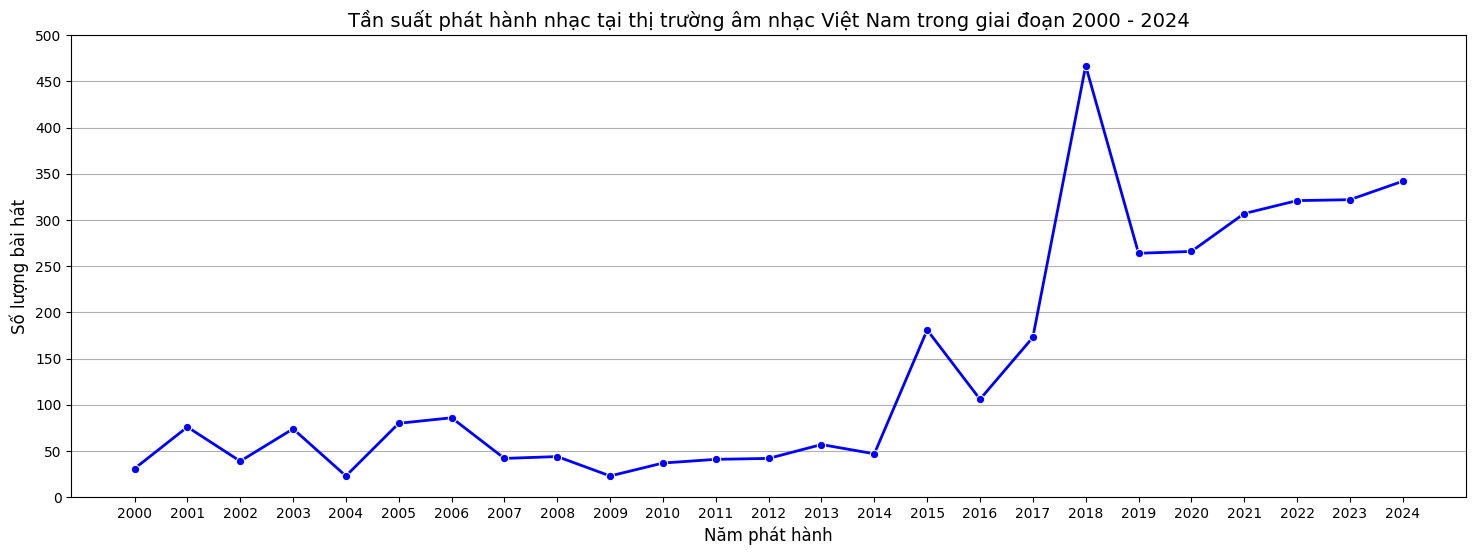

In [ ]:
plt.figure(figsize=(18, 6))

sns.lineplot(x=tracks_2000_2024.index, y=tracks_2000_2024.values, marker='o', color='b', linewidth=2)

plt.xlabel(xlabel='Năm phát hành', fontsize=12)
plt.ylabel(ylabel='Số lượng bài hát', fontsize=12)
plt.title(label='Tần suất phát hành nhạc tại thị trường âm nhạc Việt Nam trong giai đoạn 2000 - 2024', fontsize=14)

plt.xticks(ticks=range(2000, 2025, 1))
plt.yticks(ticks=range(0, 501, 50))

plt.grid(axis='y')

plt.savefig("vietnam_music_release_trend.svg", format="svg", dpi=300)
plt.show()

**Nhận xét về tần suất phát hành nhạc tại thị trường âm nhạc Việt Nam trong 25 năm trở lại đây (2000 - 2024)**

- Trong giai đoạn **2000 - 2014** thì số lượng bài hát phát hành hàng năm **khá thấp** và **không có sự tăng trưởng rõ ràng**
- Trong giai đoạn **2015 - 2018** cho thấy xu hướng phát hành nhạc **tăng đột biến**, đặc biệt là **năm 2018** với số lượng bài hát đạt mức **cao nhất** (**450 bài**)
- **Sau năm 2018**, số lượng bài hát **giảm mạnh vào năm 2019** nhưng từ năm **2020** **trở đi**, số lượng phát hành dần **tăng trở lại** và **duy trì ổn định** ở mức cao hơn so với trước 2015
- Xu hướng phát hành nhạc tại Việt Nam đang có dấu hiệu **ổn định hơn sau giai đoạn biến động mạnh từ 2018 - 2019**

#### **Câu 2:** Phân bố thời lượng các bài hát trên Spotify tại thị trường âm nhạc Việt Nam như thế nào?

**Các bước thực hiện**:
1. Chuyển đổi dữ liệu thời lượng bài hát
2. Vẽ biểu đồ histogram thể hiện phân bố thời lượng bài hát
3. Tùy chỉnh trục, nhãn và tiêu đề cho biểu đồ
4. Hiển thị biểu đồ kết quả
5. Viết nhận xét

In [32]:
tracks['duration_min'] = tracks['duration_ms'] / 60000  

AttributeError: Rectangle.set() got an unexpected keyword argument 'bw_adjust'

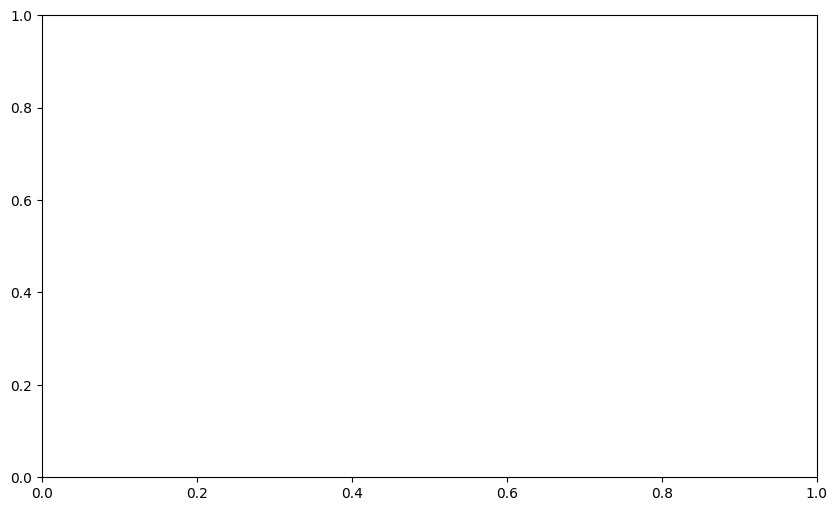

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(tracks['duration_min'], bins=50, kde=True, color='green', lw=5)

plt.title("Phân bố thời lượng bài hát trên Spotify tại Việt Nam", fontsize=14)
plt.xlabel("Thời lượng bài hát (phút)", fontsize=12)
plt.ylabel("Số lượng bài hát", fontsize=12)

plt.savefig("song-time-distribution.svg", format="svg", dpi=300)
plt.show()

**Nhận xét về phân bố thời lượng bài hát trên Spotify tại Việt Nam**

- **Thời lượng trung bình** của bài hát trên Spotify tại Việt Nam thường dao động trong khoảng **3 - 4 phút** và các bài hát có **thời lượng trên 10 phút** là **vô cùng ít**

- **Phân phối lệch phải** cho thấy phần lớn bài hát có **độ dài ngắn**, chỉ một số ít bài hát có độ dài vượt trội và xu hướng này phù hợp với xu hướng nghe nhạc trực tuyến, khi người dùng **có xu hướng ưa chuộng các bài hát có độ dài tiêu chuẩn** (3 - 4 phút) thay vì các bài hát quá dài

#### **Câu 3:**  Những nghệ sĩ nào phát hành nhiều bài hát nhất trên Spotify tại thị trường âm nhạc Việt Nam trong năm 2024?

**Các bước thực hiện**:
1. Lọc dữ liệu bài hát phát hành trong năm 2024
2. Tách danh sách nghệ sĩ và đếm số bài hát của từng nghệ sĩ
3. Vẽ biểu đồ barplot thể hiện nghệ sĩ có nhiều bài hát nhất
4. Tùy chỉnh trục, nhãn và tiêu đề cho biểu đồ
5. Lưu và hiển thị biểu đồ
6. Viết nhận xét

In [36]:
tracks_2024 = tracks[tracks['release_date'].dt.year == 2024]
tracks_by_artist_2024 = tracks_2024['artists'].str.split(pat=', ').explode().str.strip().value_counts().reset_index()
tracks_by_artist_2024

,artists,count
0,Hoa Tau,74
1,Bảo Quốc,22
2,Trọng Hữu,22
3,Phượng Liên,19
4,Thanh Nga,19
...,...,...
291,Thanh Nhàn,1
292,Trang Kim Anh,1
293,Tài Lương,1
294,TDK,1


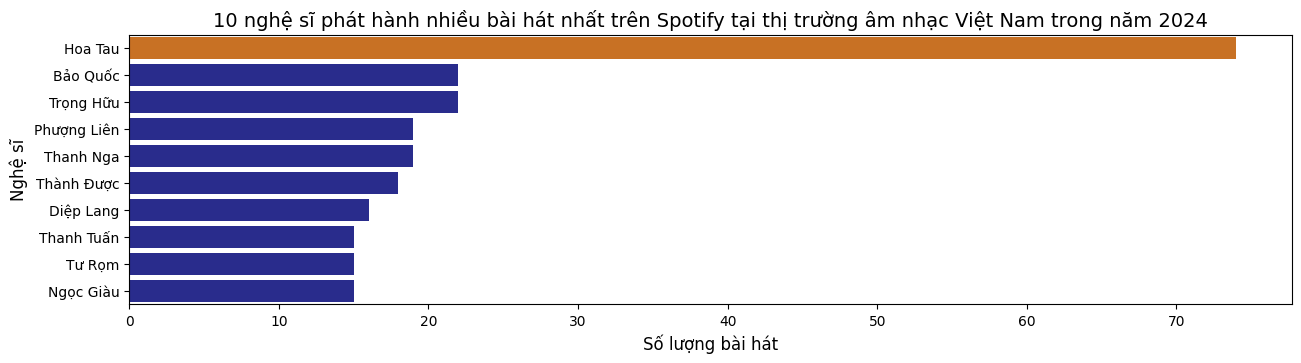

In [38]:
plt.figure(figsize=(15, 3.5))

sns.barplot(data=tracks_by_artist_2024.head(n=10), x='count', y='artists', hue='artists', orient='h',
            palette=['#e36f09' if count > 60 else '#191d9c' for count in tracks_by_artist_2024['count'].head(n=10)])

plt.xlabel(xlabel='Số lượng bài hát', fontsize=12)
plt.ylabel(ylabel='Nghệ sĩ', fontsize=12)
plt.title(label='10 nghệ sĩ phát hành nhiều bài hát nhất trên Spotify tại thị trường âm nhạc Việt Nam trong năm 2024', fontsize=14)

plt.savefig("top_artists.svg", format="svg", dpi=300)
plt.show()

**Nhận xét về 10 nghệ sĩ phát hành nhiều bài hát nhất trên Spotify tại thị trường âm nhạc Việt Nam trong năm 2024**

- **Hoa Tau** có số lượng bài hát phát hành **cao nhất**, vượt xa các nghệ sĩ còn lại với **hơn 75 bài hát** và **khoảng cách** giữa **Hoa Tau** và **nghệ sĩ đứng thứ hai** (Trọng Hữu) là **rất lớn**
- Từ vị trí thứ 2 đến thứ 10, **số lượng bài hát** dao động trong khoảng **15 - 25 bài** hát và **cũng khá đồng đều**

#### **Câu 4:** Tỉ lệ các loại album trên Spotify tại thị trường âm nhạc Việt Nam như thế nào?

**Các bước thực hiện**:
1. Đếm số lượng từng loại album
2. Vẽ biểu đồ tròn (pie chart) thể hiện tỉ lệ từng loại album
3. Tùy chỉnh tiêu đề và bố cục biểu đồ
4. Lưu và hiển thị biểu đồ
5. Viết nhận xét

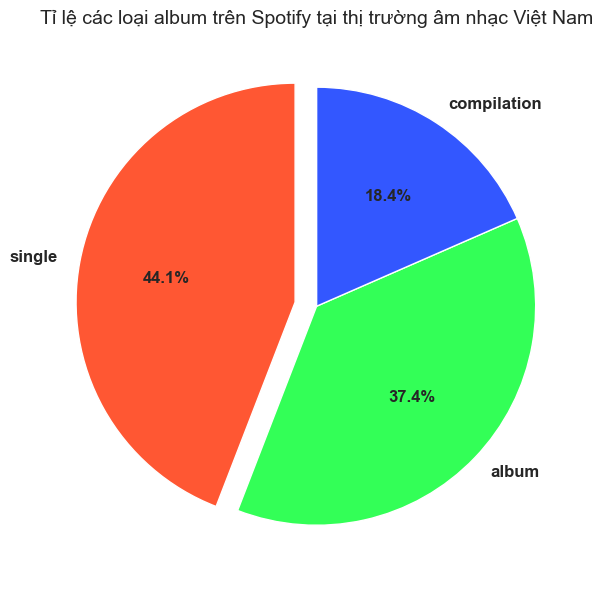

In [547]:
tracks['album_type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(8, 6),
    explode=(0.1, 0, 0),
    colors=['#FF5733', '#33FF57', '#3357FF'],
    textprops={'fontsize': 12, 'fontweight': 'bold'},
)

plt.title(label='Tỉ lệ các loại album trên Spotify tại thị trường âm nhạc Việt Nam', fontsize=14)
plt.ylabel(ylabel='')

plt.tight_layout()

plt.savefig("album_type_percentage.svg", format="svg", dpi=300)

plt.show()

**Nhận xét về tỉ lệ các loại album trên Spotify tại thị trường âm nhạc Việt Nam**

- **Single** (đĩa đơn) chiếm **phần lớn 44.1%** cho thấy **xu hướng phát hành nhạc** hiện đại **tập trung vào từng bài hát riêng lẻ** thay vì album hoàn chỉnh
- **Compilation** (tuyển tập) chiếm **18.4%** cho thấy tính **ít phổ biến hơn**, có thể do đặc thù của loại album này chủ yếu được phát hành theo *sự kiện* hoặc bởi *các hãng thu âm lớn*

#### **Câu 5:** Phân bố số lượng người theo dõi và độ phổ biến của các nghệ sĩ trên Spotify tại thị trường âm nhạc Việt Nam như thế nào?

**Các bước thực hiện**:
1. Sử dụng dữ liệu followers và popularity từ bảng artists
2. Vẽ biểu đồ scatter plot
3. Tùy chỉnh biểu đồ
4. Tinh chỉnh bố cục và lưu biểu đồ
5. Viết nhận xét

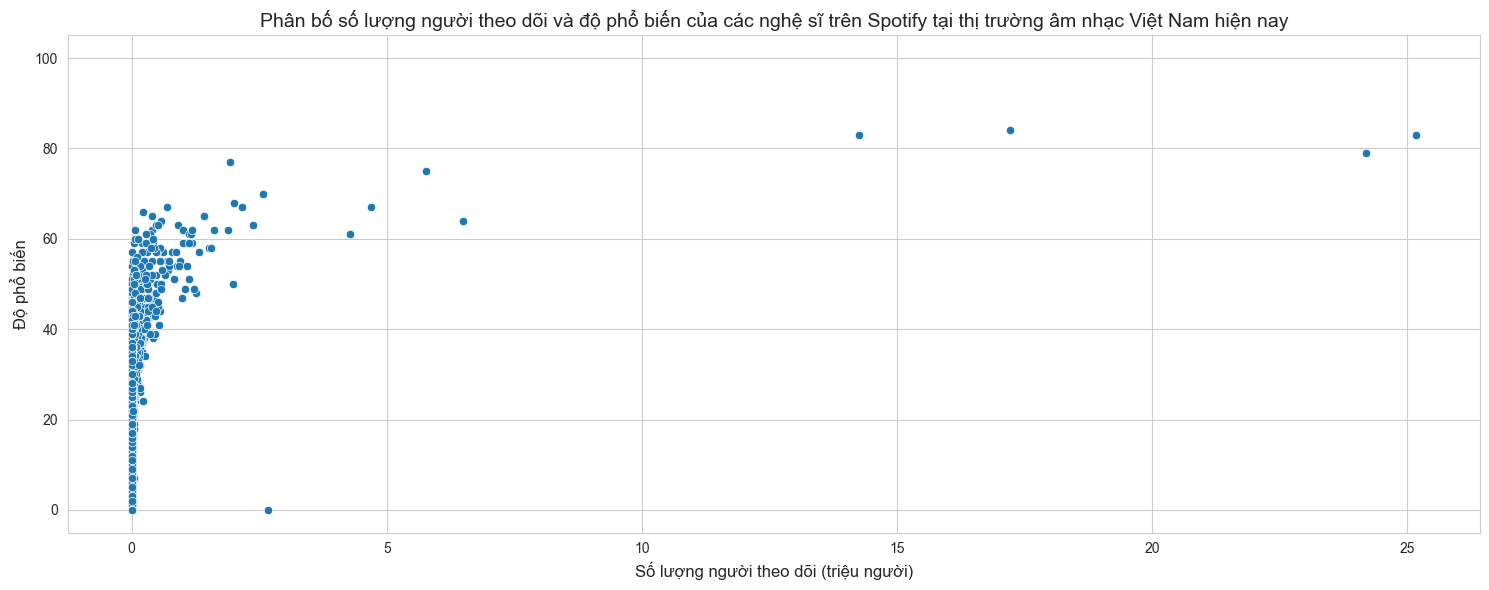

In [548]:
plt.figure(figsize=(15, 6))

sns.scatterplot(data=artists, x='followers', y='popularity')

plt.xlabel(xlabel='Số lượng người theo dõi (triệu người)', fontsize=12)
plt.ylabel(ylabel='Độ phổ biến', fontsize=12)
plt.title(label='Phân bố số lượng người theo dõi và độ phổ biến của các nghệ sĩ trên Spotify tại thị trường âm nhạc Việt Nam hiện nay', fontsize=14)

plt.xticks(ticks=range(0, 25000001, 5000000), labels=[f'{i}' for i in range(0, 26, 5)])
plt.yticks(ticks=range(0, 101, 20))
plt.ylim(bottom=-5, top=105)

plt.tight_layout()

plt.savefig("followers_popularity_distribution.svg", format="svg", dpi=300)

plt.show()

**Nhận xét về phân bố số lượng người theo dõi và độ phổ biến của các nghệ sĩ trên Spotify tại thị trường âm nhạc Việt Nam hiện nay**

- **Phần lớn nghệ sĩ** có số lượng người theo dõi **khá thấp** (**dưới 1 triệu**) nhưng vẫn có **độ phổ biến trung bình đến cao** bên cạnh đó là một số **ít nghệ sĩ** có lượng theo dõi **rất cao** (**>10 triệu**) và **độ phổ biến cũng cao**
- Có một số điểm dữ liệu **nằm rải rác**, thể hiện **các nghệ sĩ có lượng người theo dõi cao** nhưng **độ phổ biến không quá nổi bật**, hoặc ngược lại
- Vì thế, nhìn chung, **độ phổ biến** không chỉ phụ thuộc vào **số người theo dõi** mà còn bị **ảnh hưởng bởi các yếu tố khác** như *tần suất ra nhạc*, *mức độ viral của bài hát*,...

#### **Câu 6:** Gom nhóm nghệ sĩ và đưa gợi ý về chiến lược phát triển cho từng nhóm

**Các bước thực hiện**:
1. Chuẩn bị dữ liệu bằng việc chọn các thuộc tính followers (số lượng người theo dõi) và
popularity (độ phổ biến) để phân cụm
2. Chuẩn hóa dữ liệu
3. Xác định số cụm tối ưu
4.  Áp dụng thuật toán K-Means với k = ?
5. Minh họa phân cụm bằng biểu đồ violin plot
6. Đề xuất chiến lược phát triển cho từng nhóm

In [549]:
features = artists.loc[:, ['followers', 'popularity']]
features

,followers,popularity
0,0,0
1,50154,43
2,2,0
3,128,4
4,19887,13
...,...,...
1467,1176658,62
1468,778,17
1469,479164,44
1470,295725,41


In [550]:
features_scaled = StandardScaler().fit_transform(features)
features_scaled

array([[-0.1252283 , -1.3797145 ],
       [-0.08103981,  0.98299339],
       [-0.12522654, -1.3797145 ],
       ...,
       [ 0.29694212,  1.03794008],
       [ 0.13532205,  0.8731    ],
       [ 1.12621691,  2.19182068]])

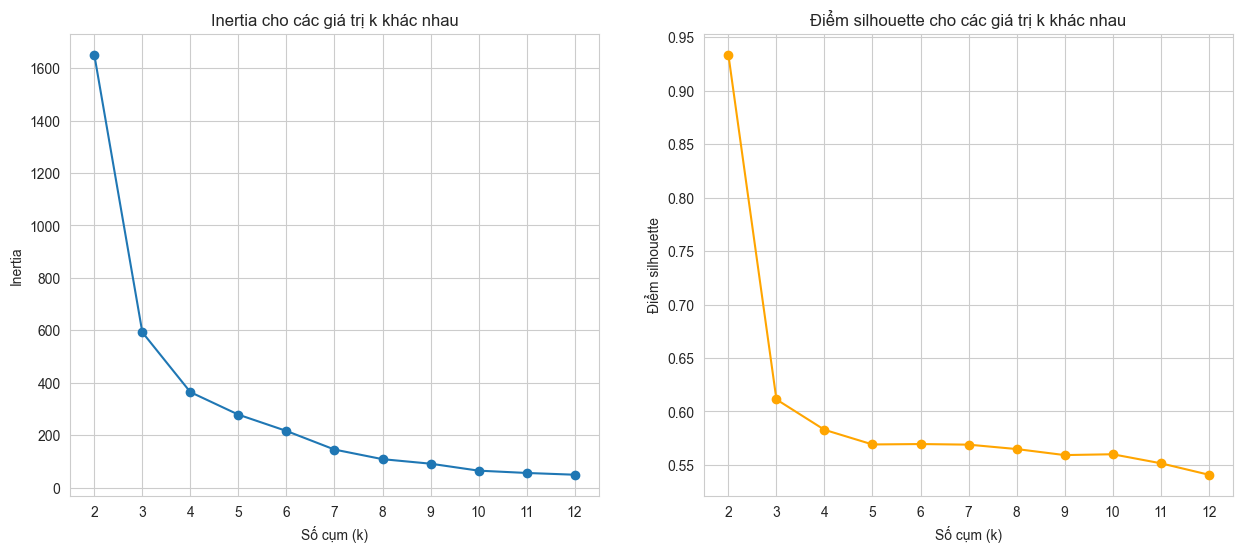

In [551]:
inertias = []
silhouette_scores = []
k_values = range(2, 13)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2, max_iter=1000)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_scores.append(silhouette_score(features_scaled, cluster_labels))
    inertias.append(kmeans.inertia_)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes[0].plot(k_values, inertias, marker='o')
axes[0].set_title(label='Inertia cho các giá trị k khác nhau')
axes[0].set_xlabel(xlabel='Số cụm (k)')
axes[0].set_ylabel(ylabel='Inertia')
axes[0].set_xticks(ticks=k_values)

axes[1].plot(k_values, silhouette_scores, marker='o', color='orange')
axes[1].set_title('Điểm silhouette cho các giá trị k khác nhau')
axes[1].set_xlabel(xlabel='Số cụm (k)')
axes[1].set_ylabel(ylabel='Điểm silhouette')
axes[1].set_xticks(ticks=k_values)

plt.savefig("inertia.svg", format="svg", dpi=300)

plt.show()

In [552]:
kmeans = KMeans(n_clusters=3, random_state=2, max_iter=1000)
cluster_labels = kmeans.fit_predict(features_scaled)
cluster_labels

array([0, 2, 0, ..., 2, 2, 2])

In [553]:
artists['cluster'] = cluster_labels
artists.head()

,name,followers,popularity,spotify_url,cluster
0,Phi Thoàn,0,0,https://open.spotify.com/artist/2aTU3x15AENbho...,0
1,D Blue,50154,43,https://open.spotify.com/artist/7JRDlOAUMJuLKm...,2
2,Tridang,2,0,https://open.spotify.com/artist/7ooiucbWXydMWY...,0
3,Redshine,128,4,https://open.spotify.com/artist/6V2hxt1eky76f5...,0
4,Uyên Trang,19887,13,https://open.spotify.com/artist/5ZTYPfGq5HTtBj...,0


In [554]:
artists[artists['followers'] == 0]

,name,followers,popularity,spotify_url,cluster
0,Phi Thoàn,0,0,https://open.spotify.com/artist/2aTU3x15AENbho...,0
6,ウッ・バッ・ラン,0,0,https://open.spotify.com/artist/1TiyIGdIu0d5EH...,0
13,NSUT Ngọc Giàu,0,0,https://open.spotify.com/artist/75xURm9qVgcoaI...,0
16,Bạch Huệ,0,0,https://open.spotify.com/artist/2LQJPWPX8f81QG...,0
71,Hiếu Liêm,0,0,https://open.spotify.com/artist/2hpthGP9XZPyrM...,0
...,...,...,...,...,...
1403,Kim Hoa,0,0,https://open.spotify.com/artist/2LKSB3HjmmaEda...,0
1431,Minh Hiển,0,0,https://open.spotify.com/artist/7jMpt6oVBrpLLo...,0
1435,Vũ Đức,0,0,https://open.spotify.com/artist/0AsKK2Pm2aueuP...,0
1443,フォン・クアン,0,0,https://open.spotify.com/artist/54bXuwZ3WjlhrL...,0


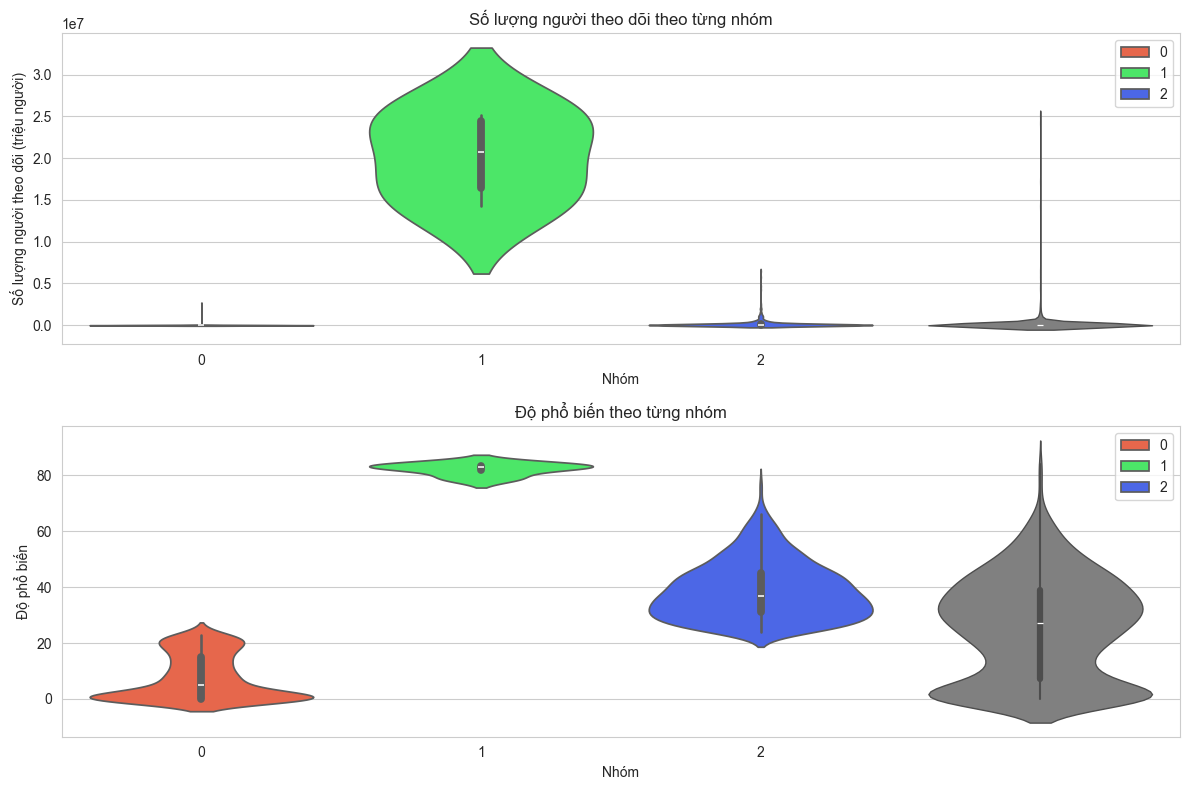

In [555]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
cluster_colors = ['#FF5733', '#33FF57', '#3357FF']

sns.violinplot(x=artists['cluster'], y=artists['followers'], palette=cluster_colors, hue=artists['cluster'], ax=axes[0])
sns.violinplot(y=artists['followers'], color='gray', linewidth=1, ax=axes[0])
axes[0].set_xlabel(xlabel='Nhóm')
axes[0].set_ylabel(ylabel='Số lượng người theo dõi (triệu người)')
axes[0].set_title(label='Số lượng người theo dõi theo từng nhóm')

sns.violinplot(x=artists['cluster'], y=artists['popularity'], palette=cluster_colors, hue=artists['cluster'], ax=axes[1])
sns.violinplot(y=artists['popularity'], color='gray', linewidth=1, ax=axes[1])
axes[1].set_xlabel(xlabel='Nhóm')
axes[1].set_ylabel(ylabel='Độ phổ biến')
axes[1].set_title(label='Độ phổ biến theo từng nhóm')

plt.tight_layout()

plt.savefig("k-means-followers-popularity.svg", format="svg", dpi=300)

plt.show()

**Nhận xét về biểu đồ số lượng người theo dõi (followers)**

- **Nhóm 0 (màu đỏ)** có **số lượng người theo dõi rất thấp**, phân bố tập trung gần 0. Điều này cho thấy đây là **nhóm nghệ sĩ mới**, chưa có lượng fan đáng kể
- **Nhóm 1 (màu xanh lá)** sở hữu **số lượng người theo dõi rất cao**, phân bố rộng nhưng tập trung nhiều trong **khoảng từ 10 triệu đến hơn 30 triệu** người theo dõi
- **Nhóm 2 (màu xanh dương)** có **phân bố người  theo dõi rất thấp**, một số điểm có giá trị cao đột biến nhưng đa số nằm gần 0. Điều này cho thấy nhóm này **có sự chênh lệch lớn giữa các nghệ sĩ**, có thể có **một số ít người nổi bật** nhưng **phần lớn chưa có lượng fan đáng kể**

**Nhận xét về biểu đồ độ phổ biến (popularity)**
- **Nhóm 0 (màu đỏ)** có **độ phổ biến rất thấp**, phần lớn **nằm dưới 20**, cho thấy các nghệ sĩ trong nhóm này **chưa có nhiều sự chú ý từ công chúng**
- **Nhóm 1 (màu xanh lá)** sở hữu **độ phổ biến rất cao**, tập trung **ở mức 80+**, chứng tỏ đây là nhóm nghệ sĩ **có sức ảnh hưởng mạnh mẽ và đang dẫn đầu thị trường**
- **Nhóm 2 (màu xanh dương)** có **sự phân bố rộng**, có mức độ phổ biến **từ 20 đến hơn 60**. Điều này cho thấy đây là **nhóm nghệ sĩ tiềm năng, một số có sức hút cao nhưng chưa đạt đến mức độ nổi tiếng như nhóm 1**

**Kết luận**

Những nghệ sĩ thuộc **nhóm 1** là **những nghệ sĩ nổi tiếng**, có lượng fan đông đảo, độ phổ biến cao. Vì vậy có thể **duy trì vị thế, mở rộng thị trường, khai thác các xu hướng toàn cầu**

Những nghệ sĩ thuộc **nhóm 2** là những **nghệ sĩ có tiềm năng**. Dù họ có số lượng người theo dõi không quá nổi bật nhưng bù lại họ có mức độ phổ biến đa dạng. Vì thế họ **có thể hợp tác với nghệ sĩ lớn, đầu tư vào quảng bá để gia tăng tầm ảnh hưởng**

Cuối cùng, những nghệ sĩ thuộc **nhóm 0** là những **nghệ sĩ mới** do vậy họ có lượng fan ít và độ phổ biến còn thấp. Do đó, họ **có thể tận dụng các nền tảng mạng xã hội để quảng cáo để thu hút sự chú ý**